In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [2]:
df = pd.read_csv("../data/adult.csv").drop("Unnamed: 0", axis=1)
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38


In [3]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'salary', 'salary K$'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours-per-week  32561 non-null  int64 
 9   native-country  32561 non-null  object
 10  salary          32561 non-null  object
 11  salary K$       32561 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [5]:
df = df.replace("?", np.nan).dropna()
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38


In [6]:
df[(df["salary K$"] > 50) & (df["salary"] != ">50K")]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$


In [7]:
df[(df["salary K$"] <= 50) & (df["salary"] != "<=50K")]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$


# Task 1
Print the count of men and women in the dataset.

In [8]:
df["sex"].value_counts()["Male"]

np.int64(20380)

In [9]:
df["sex"].value_counts()["Female"]

np.int64(9782)

# Task 2
Find the average age of men in dataset

In [10]:
df[df["sex"] == "Male"]["age"].mean()

np.float64(39.18400392541707)

# Task 3
Get the percentage of people from Poland (native-country)

In [11]:
(df["native-country"].value_counts()["Poland"] / df.shape[0]) * 100

np.float64(0.18566408063125786)

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [12]:
df[df["salary"] == ">50K"]["age"].mean()

np.float64(43.95911028236548)

In [13]:
df[df["salary"] == ">50K"]["age"].std()

np.float64(10.269632835673852)

In [14]:
df[df["salary"] == "<=50K"]["age"].mean()

np.float64(36.60806038668668)

In [15]:
df[df["salary"] == "<=50K"]["age"].std()

np.float64(13.464631257161633)

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [16]:
df[(~df["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"])) & (df["salary"] == ">50K")]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...
32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [17]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [18]:
def get_mask(data_frame, salary):
    return (data_frame["salary"] == salary) & (data_frame["sex"] == "Male")

{
    "married, low salary": df[get_mask(df, "<=50K") & (df["marital-status"].str.startswith("Married"))].shape[0],
    "married, high salary": df[get_mask(df, ">50K") & (df["marital-status"].str.startswith("Married"))].shape[0],
    "non-married, low salary": df[get_mask(df, "<=50K") & (~df["marital-status"].str.startswith("Married"))].shape[0],
    "non-married, high salary": df[get_mask(df, ">50K") & (~df["marital-status"].str.startswith("Married"))].shape[0],
}

{'married, low salary': 7052,
 'married, high salary': 5723,
 'non-married, low salary': 6932,
 'non-married, high salary': 673}

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [19]:
df["hours-per-week"].max()

np.int64(99)

In [20]:
df[df["hours-per-week"] == df["hours-per-week"].max()].shape[0]

78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

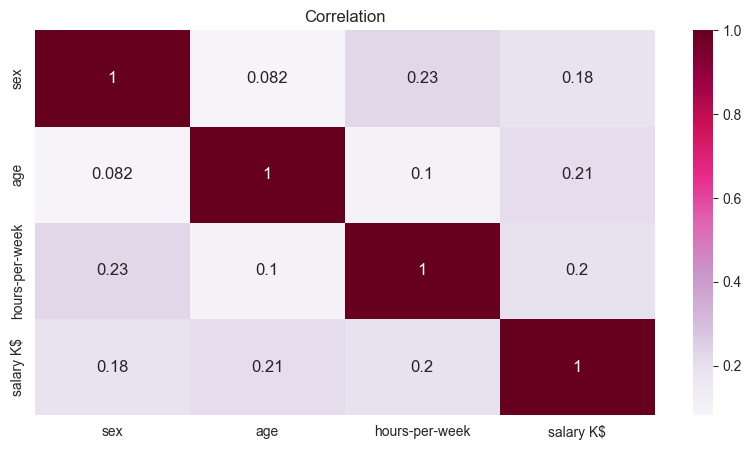

In [21]:
df["sex"] = df["sex"].astype("category").cat.codes
corr = df[["sex", "age", "hours-per-week", "salary K$"]].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Correlation")
plt.show()